In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 18
plt.rc('legend',fontsize=18)

In [2]:
name = np.array(['IPhone', 'HST', 'SDSS', 'KIDS', 'DES', 'DESI', 'JWST', 'Euclid', 'LSST'])
year = np.array([2024, 1990, 2000, 2013, 2013, 2018, 2021, 2024, 2025])
megapixels = np.array([48, 16.8, 120, 256, 570, 570, 40, 600, 3200])
cost = np.array([10**3, 16*10**9, 540*10**6, 540*10**6, 100*10**6, 175*10**6, 10**10, 606*10**6, 200*10**6])
objects = np.array([np.nan, 265*10**3, 50*10**6, 21*10**6, 390*10**6, 1.58*10**6, 50*10**3, 2*10**9, 20*10**9])
s8_fom = np.array([np.nan, np.nan, 0.027, 0.022, 0.032, 0.034, np.nan, 0.0045, 0.01])
w0_fom = np.array([np.nan, np.nan, 0.40, np.nan, 0.23, 0.061, np.nan, 0.038, 0.15])

matrix = np.array([year, megapixels, cost, objects, s8_fom, w0_fom])


In [3]:
print('The cost of the Euclid is', matrix[2][-2]/10**6, 'USD')
print('The cost of the DES is', matrix[2][4]/10**6, 'USD')
print('The FOM of the Euclid is', matrix[-2][-2], 'on s8')
print('The FOM of the DES is', matrix[-2][4], 'on s8')
m = (matrix[-2][4]-matrix[-2][-2])/(matrix[2][4]-matrix[2][-2])
c = matrix[-2][4]-m*matrix[2][4]
wanted_error = 0.0045
needed_cost = (wanted_error-c)/m
print('The cost needed to reach the desired s8 FOM',  wanted_error, 'is', needed_cost/10**6, 'USD')

The cost of the Euclid is 606.0 USD
The cost of the DES is 100.0 USD
The FOM of the Euclid is 0.0045 on s8
The FOM of the DES is 0.032 on s8
The cost needed to reach the desired s8 FOM 0.0045 is 606.0 USD


In [4]:
print('The cost of the Euclid is', matrix[2][-2]/10**6, 'million USD')
print('The cost of the DESI is', matrix[2][5]/10**6, 'million USD')
print('The FOM of the Euclid is', matrix[-1][-2], 'on w0')
print('The FOM of the DESI is', matrix[-1][5], 'on w0')
m = (matrix[-1][5]-matrix[-1][-2])/(matrix[2][5]-matrix[2][-2])
c = matrix[-1][5]-m*matrix[2][5]
wanted_error = 0.061
needed_cost = (wanted_error-c)/m
print('The cost needed to reach the desired w0 FOM ',  wanted_error, 'is', needed_cost/10**6, 'million USD')

The cost of the Euclid is 606.0 million USD
The cost of the DESI is 175.0 million USD
The FOM of the Euclid is 0.038 on w0
The FOM of the DESI is 0.061 on w0
The cost needed to reach the desired w0 FOM  0.061 is 174.99999999999997 million USD


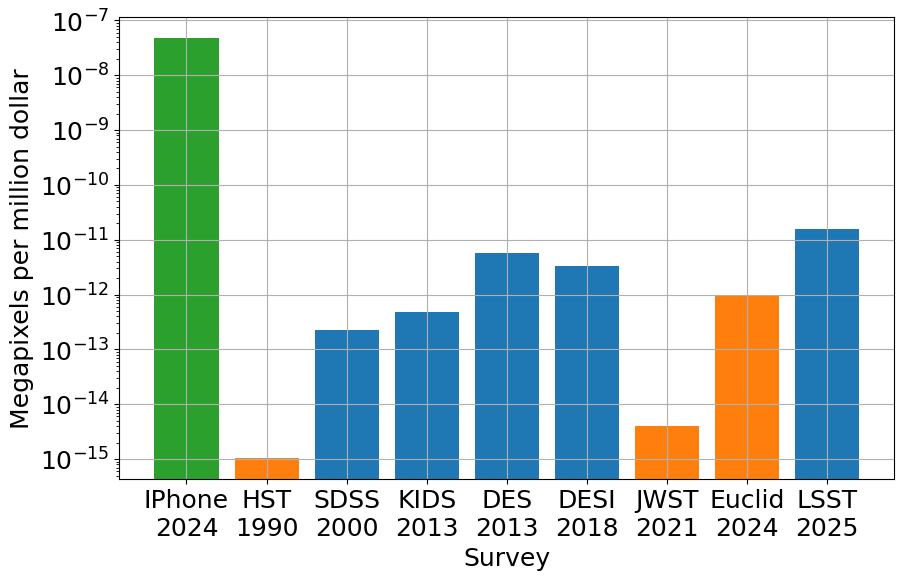

In [5]:
# Calculate megapixels per cost
megapixels_per_cost = megapixels / cost / 10**6

# Define colors for each bar
colors = ['tab:blue'] * len(name)
highlight = ['HST', 'JWST', 'Euclid']
highlight_iphone = ['IPhone']
for i, n in enumerate(name):
    if n in highlight:
        colors[i] = 'tab:orange'
    elif n in highlight_iphone:
        colors[i] = 'tab:green'

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(name, megapixels_per_cost, color=colors)

new_labels = [f'{n}\n{y}' for n, y in zip(name, year)]
plt.xticks(ticks=range(len(name)), labels=new_labels)

plt.yscale('log')
plt.xlabel('Survey')
plt.ylabel('Megapixels per million dollar')
plt.grid()
plt.show()

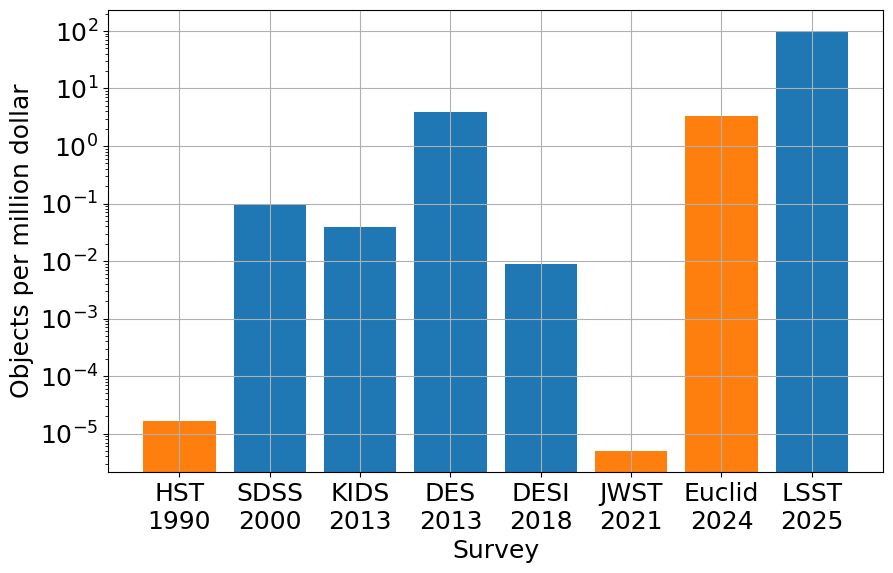

In [6]:
# Calculate megapixels per cost
object_per_cost = (objects / cost)[1:]

# Define colors for each bar
colors = ['tab:blue'] * len(name[1:])
highlight = ['HST', 'JWST', 'Euclid']
for i, n in enumerate(name[1:]):
    if n in highlight:
        colors[i] = 'tab:orange'

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(name[1:], object_per_cost, color=colors)
new_labels = [f'{n}\n{y}' for n, y in zip(name, year)]
plt.xticks(ticks=range(len(name)-1), labels=new_labels[1:])

plt.yscale('log')
plt.xlabel('Survey')
plt.ylabel('Objects per million dollar')
plt.grid()
plt.show()

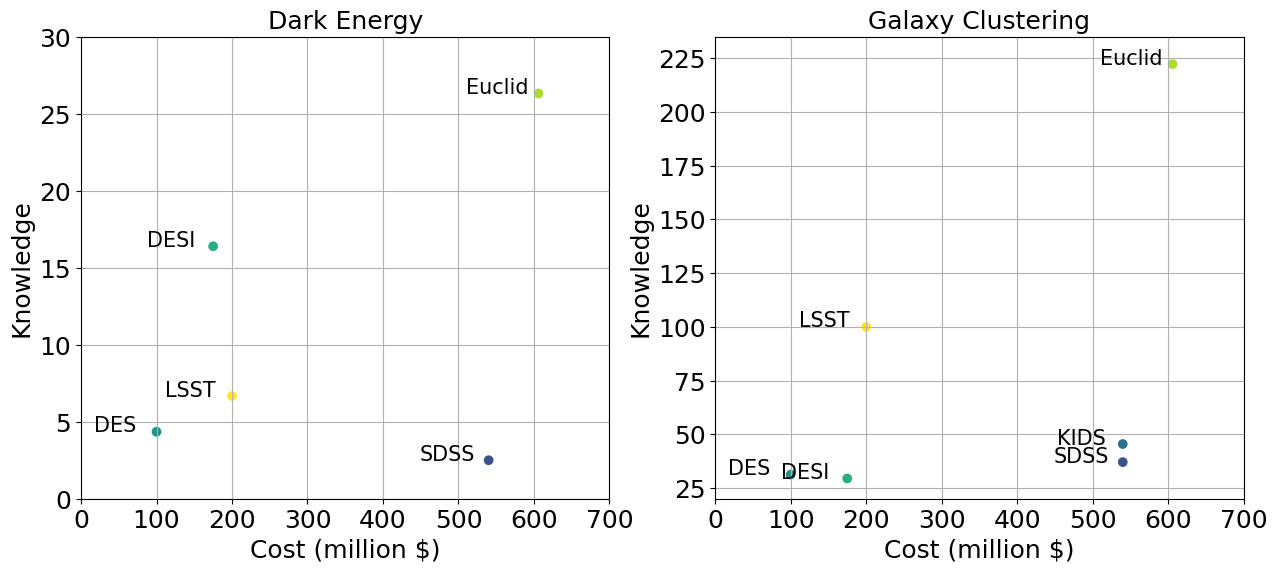

In [7]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Define colors for each point
colors = plt.cm.viridis(np.linspace(0, 1, len(name)))

# Plot w0_fom against cost in the first subplot
ax1.scatter(cost[~np.isnan(w0_fom)]/10**6, 1/w0_fom[~np.isnan(w0_fom)], color=colors[~np.isnan(w0_fom)])
# Add labels to the points
for i, txt in enumerate(name):
    if not np.isnan(w0_fom[i]):
        ax1.annotate(txt, (cost[i]/10**6, 1/w0_fom[i]), textcoords="offset points", xytext=(-30,0), ha='center', fontsize=15)

# Plot s8_fom against cost in the second subplot
ax2.scatter(cost[~np.isnan(s8_fom)]/10**6, 1/s8_fom[~np.isnan(s8_fom)], color=colors[~np.isnan(s8_fom)])
# Add labels to the points
for i, txt in enumerate(name):
    if not np.isnan(s8_fom[i]):
        ax2.annotate(txt, (cost[i]/10**6, 1/s8_fom[i]), textcoords="offset points", xytext=(-30,0), ha='center', fontsize=15)

# Add labels and legend to the first subplot
ax1.set_xlabel('Cost (million $)')
ax1.set_ylabel('Knowledge')
ax1.set_title('Dark Energy')
ax1.set_xlim(0, 700)
ax1.set_ylim(0, 30)
ax1.grid()

# Add labels and legend to the second subplot
ax2.set_xlabel('Cost (million $)')
ax2.set_ylabel('Knowledge')
ax2.set_title('Galaxy Clustering')
ax2.set_xlim(0, 700)
ax2.set_ylim(20, 235)
ax2.grid()

# Show the plot
plt.show()

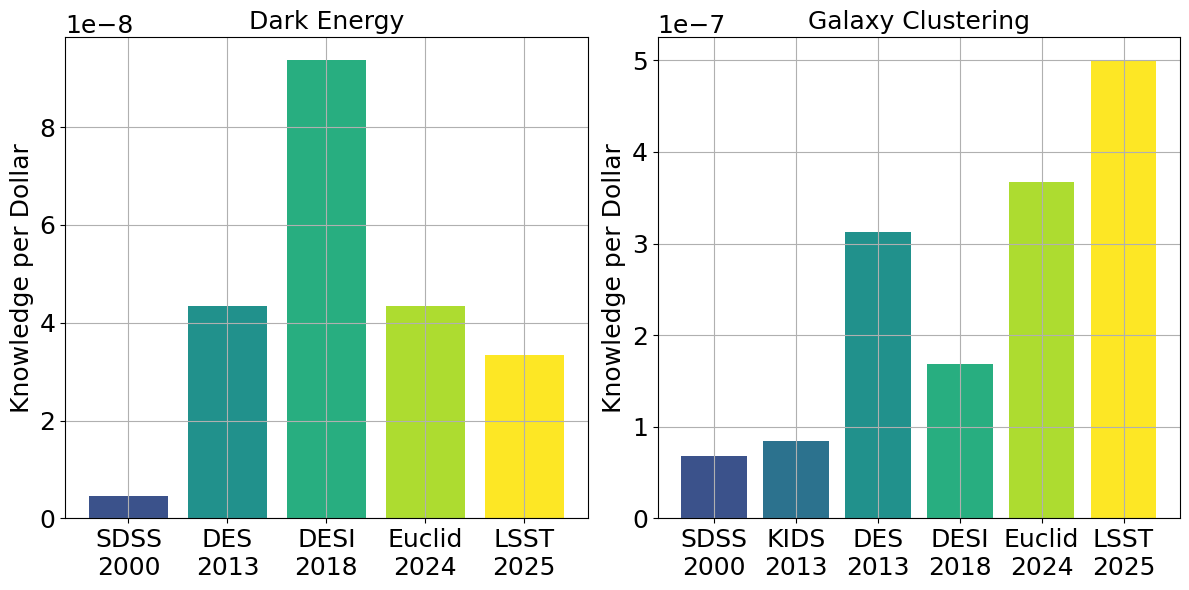

In [17]:
# Create masks to exclude NaN values for each figure of merit
valid_w0 = ~np.isnan(w0_fom)
valid_s8 = ~np.isnan(s8_fom)

# Compute ratios over cost without NaNs
w0_fom_per_cost = 1/w0_fom[valid_w0] / cost[valid_w0]
s8_fom_per_cost = 1/s8_fom[valid_s8] / cost[valid_s8]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
indices_w0 = np.where(valid_w0)[0]
indices_s8 = np.where(valid_s8)[0]

# First bar plot (w0_fom)
ax1.bar(name[indices_w0], w0_fom_per_cost, color=colors[indices_w0])
ax1.set_ylabel('Knowledge per Dollar')
ax1.set_title('Dark Energy')
#ax1.set_yscale('log')
ax1.set_xticks(range(len(indices_w0)))
ax1.set_xticklabels([f"{name[i]}\n{year[i]}" for i in indices_w0])
ax1.grid()

# Second bar plot (s8_fom)
ax2.bar(name[indices_s8], s8_fom_per_cost, color=colors[indices_s8])
ax2.set_ylabel('Knowledge per Dollar')
ax2.set_title('Galaxy Clustering')
#ax2.set_yscale('log')
ax2.set_xticks(range(len(indices_s8)))
ax2.set_xticklabels([f"{name[i]}\n{year[i]}" for i in indices_s8])
ax2.grid()

plt.tight_layout()
plt.show()

For Galaxy clustering against CGG21 starting with Euclid. Euclid-DES linear cost evolution.
| Cost (millions) | error / (\delta_m/sigma) | 0.5  | 1    | 2     |
| -----------     | -----------              | ---  | ---  | ---   |
| 606 $           | 0.0045 (Euclid)          | 0.94 | 1.88 | 3.77  |
| 639 $           | 0.0027                   | 1.67 | 3.35 | 6.69  |
| 671 $           | 0.0010                   | 4.67 | 9.35 | 18.69 |

For Dark Energy against DESI+CMB+SNe starting with Euclid. Euclid-DESI linear cost evolution.
| Cost (millions) | error / (\delta_m/sigma) | 0.5  | 1     | 2     |
| -----------     | -----------              | ---  | ---   | ---   |
| 606 $           | 0.038 (DESI)             | 0.68 | 1.36  | 2.73  |
| 943 $           | 0.02                     | 1.45 | 2.9   | 5.8   |
| 1224 $          | 0.005                    | 6.08 | 12.16 | 24.32 |

In [9]:
def new_sig(sig1, sig2):
    return ((1/sig1**2)+(1/sig2**2))**(-1/2)

def new_mean(sig1, sig2, alpha):
    return (alpha*sig1)/(1 + sig2**2/sig1**2)


In [10]:
sig1 = 0.061
sig2 = 0.005
alpha = 2
sig3 = new_sig(sig1, sig2)
mean3 = new_mean(sig1, sig2, alpha)
T = np.round(mean3/sig3, 2)
print(T)


24.32
